# Домашнее задание №3

In [1]:
import numpy as np
from hashlib import sha256

def check(image, ref_hash):
    image_hash = sha256(np.ascontiguousarray(image)).hexdigest()
    if image_hash == ref_hash:
        print("All good \U0001F44D")
    else:
        raise RuntimeError("Image hash differ: " + image_hash)

## Задание 1

Дописать функцию для вывода метрик PSNR и SSIM

In [2]:
import cv2
import skimage.metrics

def get_metrics_str(lhs_image, rhs_image):
    # Write your code here
    psnr = cv2.PSNR(lhs_image, rhs_image)
    ssim = skimage.metrics.structural_similarity(lhs_image, rhs_image)
    return str(f"PSNR = {psnr}\nSSIM = {ssim}")

## Задание 2

Преобразовать исходное изображение в градации серого

In [3]:
import cv2
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1Wa3GFIODv1Ni13MCmmAjptF3VxelGSgr&export=download'
src_image = skimage.io.imread(src_image_url)

In [4]:
# Write your code here
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

In [5]:
check(gray_image, "26f1edc9bcde27b8e39f14cb7d46ce3057d4bfacd6d9ed4f47193a9fa435f340")

All good 👍


## Задание 3

Добавить на исходное изображение гауссов шум

In [6]:
import skimage.util

seed = 42

# Write your code here
noised_image = (skimage.util.random_noise(gray_image, mode='gaussian', rng=seed) * (np.iinfo(np.uint8).max)).astype(np.uint8)

RuntimeError: Image hash differ: 1b5c64250d6ed0a7933e9742e468e6949bae23293324e55251ab1fbb968e5f7d

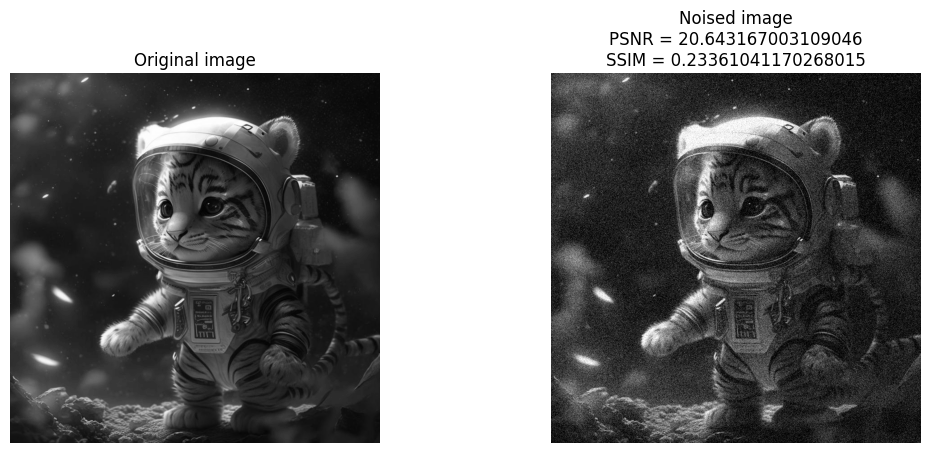

In [7]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(noised_image, cmap='gray')
plt.axis("off")
plt.title("Noised image\n" + get_metrics_str(gray_image, noised_image))

check(noised_image, "890914194c06f8770573990853591633cf5cbbda73ee22dab40563a7ae99a68d")

## Задание 4

Провести фильтрацию среднеарифметическим фильтром

In [8]:
# Write your code here
m = 5
n = 5

blured_image = cv2.blur(noised_image, (m, n))

RuntimeError: Image hash differ: 073455e58b84a96ca05f7a96a6ff401c64423730de8aa808cbd95062857f41b7

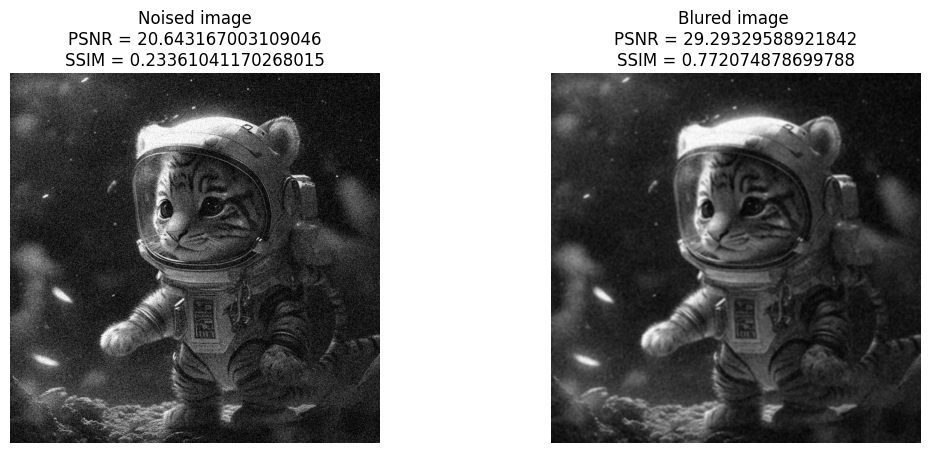

In [9]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(noised_image, cmap='gray')
plt.axis("off")
plt.title("Noised image\n" + get_metrics_str(gray_image, noised_image))

plt.subplot(1, 2, 2)
plt.imshow(blured_image, cmap='gray')
plt.axis("off")
plt.title("Blured image \n" + get_metrics_str(gray_image, blured_image))

check(blured_image, "e06af1d5960cbb9f6eaecff9e75d2ad8c560878a43bb47d07a03e9e896d61b1f")

## Задание 5

Провести фильтрацию среднегеометрическим фильтром

## $$\hat{f}(x, y) = \left( \prod_{(s, t) \in S_{xy}} g(s, t) \right) ^ \frac{1}{mn}$$
## $$\hat{f}(x, y)= e ^ {\ln \hat{f}(x, y)} = e ^ {\frac{1}{mn} \sum\limits_{(s, t) \in S_{xy}} \ln g(s, t)}$$

In [10]:
# Write your code here
m = 5
n = 5

log_image = np.log(noised_image, out=np.zeros_like(noised_image, dtype=np.float64), where=(noised_image!=0))
blured_image = np.exp(cv2.blur(log_image, (m, n))).astype('uint8')

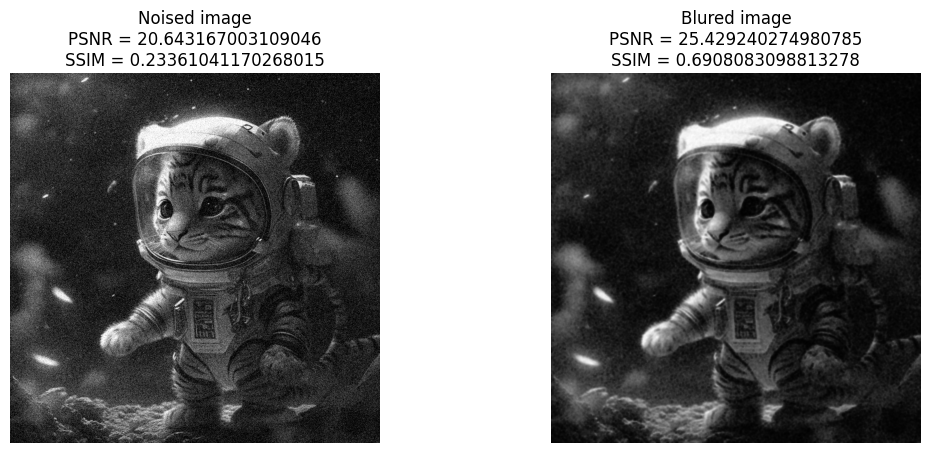

In [11]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(noised_image, cmap='gray')
plt.axis("off")
plt.title("Noised image\n" + get_metrics_str(gray_image, noised_image))

plt.subplot(1, 2, 2)
plt.imshow(blured_image, cmap='gray')
plt.axis("off")
plt.title("Blured image\n" + get_metrics_str(gray_image, blured_image));

## Задание 6

Преобразовать изображение в градации серого и добавить шум «соль и перец»

In [12]:
src_image_url = 'https://drive.google.com/u/0/uc?id=1XQiXS3MN7yaQLE4PuevaqconUwyN_E9L&export=download'
src_image = skimage.io.imread(src_image_url)

In [13]:
import skimage.util

seed = 42
noise_power = 50

# Write your code here
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)
noised_image = (skimage.util.random_noise(gray_image, mode='s&p', amount=noise_power/100, rng=seed) * (np.iinfo(np.uint8).max)).astype('uint8')

RuntimeError: Image hash differ: d5758234b6352fa92b2df68ee5b9a5c92fd4e0a5b080b0cc247211fbf27a4e39

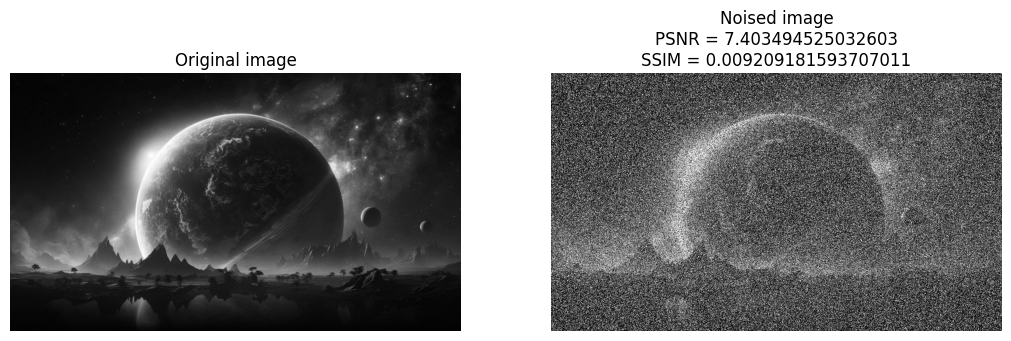

In [14]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(noised_image, cmap='gray')
plt.axis("off")
plt.title("Noised image\n" + get_metrics_str(gray_image, noised_image))

check(noised_image, "b68027d668d01b0a49e3cb62f292a1bf9c8547e06e4f3b3c2ff1ae632b90c5a8")

## Задание 7

Провести трёхкратную фильтрацию медианным фильтром размера 3x3 

In [15]:
# Write your code here
median_size = 3
median_images = [noised_image]
for i in range(3):
    median_images.append(cv2.medianBlur(median_images[-1], median_size))
median_images.pop(0);

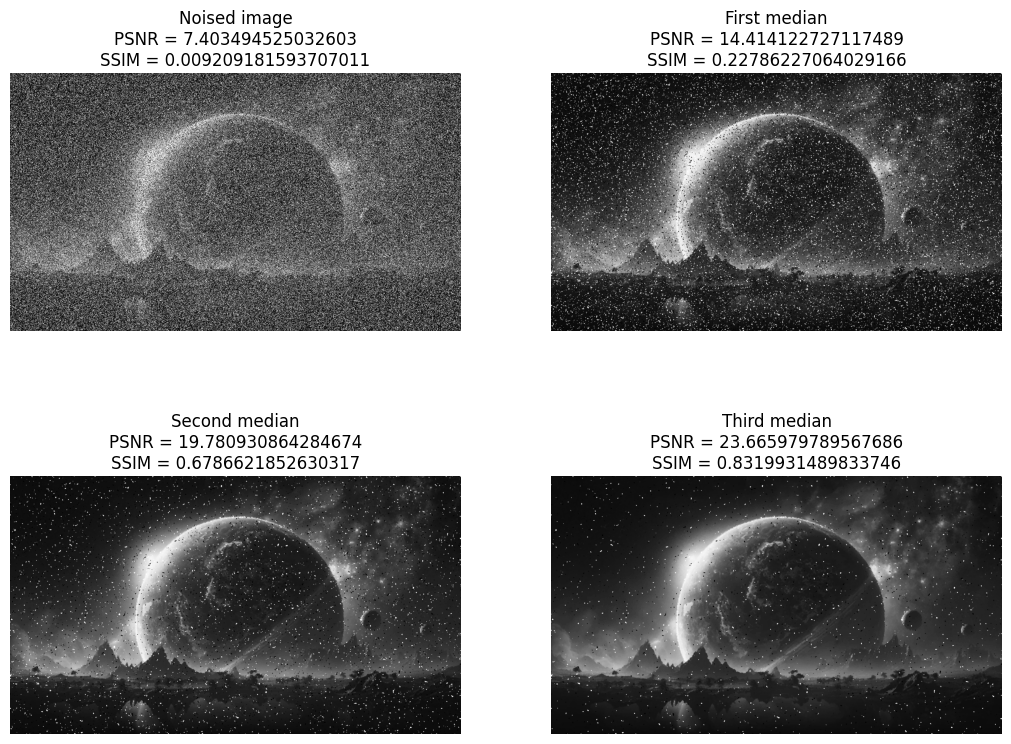

In [16]:
plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(noised_image, cmap='gray')
plt.axis("off")
plt.title("Noised image\n" + get_metrics_str(gray_image, noised_image))

num_strs = ["First", "Second", "Third"]
for i in range(0, 3):
    plt.subplot(2, 2, 2 + i)
    plt.imshow(median_images[i], cmap='gray')
    plt.axis("off")
    plt.title(num_strs[i] + " median\n" + get_metrics_str(gray_image, median_images[i]))

## Задание 8

Провести трёхкратную адаптивную медианную фильтрацию

In [17]:
import itertools

def median_idx(y, x, size, img_shape):             
    idx_arr = [[[y - 1, x], [y, x - 1], [y, x], [y, x + 1], [y + 1, x]],         # 1st filter               
               [[y - 1, x - 1], [y - 1, x + 1], [y + 1, x - 1], [y + 1, x + 1]], # 2nd filter
               [[y - 2, x], [y, x - 2], [y, x + 2], [y + 2, x]],                 # 3rd filter
               [[y - 2, x - 1], [y - 2, x + 1], [y - 1, x - 2], [y - 1, x + 2],  
                [y + 2, x - 1], [y + 2, x + 1], [y + 1, x - 2], [y + 1, x + 2]]] # 4th filter
    
    idx = itertools.chain(*idx_arr[0:size])
    idx = map(lambda pair: [min(max(pair[0], 0), img_shape[0] - 1), min(max(pair[1], 0), img_shape[1] - 1)], idx)
    return tuple(zip(*idx))

def adapt_median(img):
    # Write your code here
    output_image = img.copy()

    xlength, ylength = img.shape 
    z_min, z_med, z_max, z_xy = 0, 0, 0, 0
    
    S_max = 4
    for x in range(xlength):
        for y in range(ylength):
            S_xy = 1
            
            while True:
                neigborhood = median_idx(x, y, S_xy, img.shape)
                z_min = min(img[neigborhood])
                z_max = max(img[neigborhood])
                z_med = np.median(img[neigborhood]).astype(np.uint8)

                if S_xy == S_max or z_min < z_med < z_max:
                    break

                S_xy += 1
                
            if not z_min < z_med < z_max or not z_min < img[x, y] < z_max:
                    output_image[x, y] = z_med
            
    
    return output_image

In [18]:
adapt_median_images = []
# Write your code here

adapt_median_images = [noised_image]
for i in range(3):
    adapt_median_images.append(adapt_median(adapt_median_images[-1]))
adapt_median_images.pop(0);

Вывести PSNR и SSIM

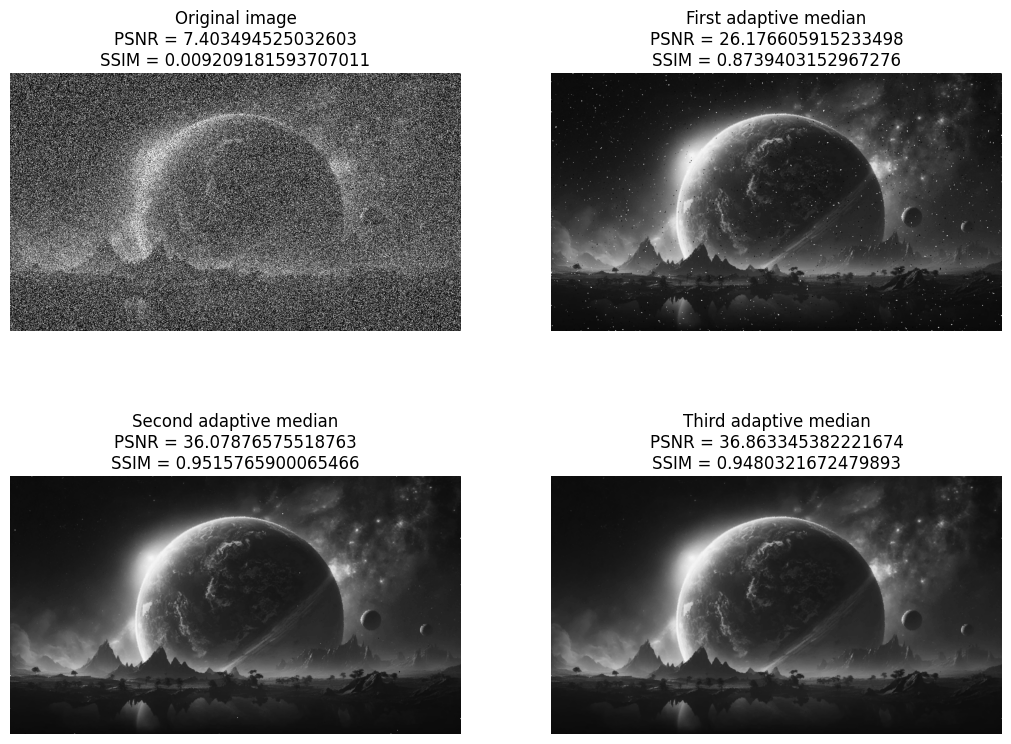

In [19]:
plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(noised_image, cmap='gray')
plt.axis("off")
plt.title("Original image\n" + get_metrics_str(gray_image, noised_image))

num_strs = ["First", "Second", "Third"]
for i in range(0, 3):
    plt.subplot(2, 2, 2 + i)
    plt.imshow(adapt_median_images[i], cmap='gray')
    plt.axis("off")
    plt.title(num_strs[i] + " adaptive median\n" + get_metrics_str(gray_image, adapt_median_images[i]))

### Выполнил: Лежнин Максим Витальевич